# Trabalho Laboratório de Pesquisa 1: Dataset Mania

## 1. Componentes

Integrantes do grupo: <br>
Helen França Medeiros: helenfranca93@gmail.com <br>
Mayke Willans Christo Pereira: maykewillans@hotmail.com <br>
Lia Casati: liac.ramaldes@gmail.com

## 2. Apresentação do Dataset

### Visão  geral

#### Descrição da base

A mania é caracterizada por humor eufórico, redução do sono, aumento da energia e interesse em diversos objetivos/projetos ao mesmo tempo, assim como aumento da libido e inquietação. Durante os episódios de mania, o pensamento torna-se muito rápido, podendo prejudicar a formação de ideias e a comunicação, o que faz com que a pessoa transmita ideias delirantes, que muitas vezes fogem da realidade.

O dataset Mania possui dados como histórico médico, informações sobre sentimentos e acontecimentos da vida pessoal dos entrevistados.

#### Objetivo

O intuito desta trabalho é fazer uma análise sobre quais variáveis tiveram maior influência na probabilidade de diagnósticos positivos, ou seja, que tipo de pessoa teve mais chance de apresentar episódios de mania.

**Quais são os tipos de atributos existentes e qual é o atributo alvo?**

Analisando o codebook, acreditamos que o dataset Mania é dividido em 3 grupos:
   1. M: informações/caracteristicas relacionadas ao transtorno comum mania
        - Exemplos: a coluna M7d responde sobre "ter comportamento inapropriado", onde as respostas são 1(sim), 5(não), 8(não sabe) e 9(recusou)
     
     
   2. SC: informações de sentimentos e/ou acontecimentos das pessoas entrevistadas
        - Exemplos: a coluna SC31 responde sobre "ter forte medo de multidões/lugares públicos", onde as respostas são 1(sim), 5(não), 8(não sabe)
        
        
   3. CC: histórico médico das pessoas entrevistadas
        - Exemplos: a coluna CC1B responde sobre "ter problemas nas costas ou no pescoço", onde as respostas são 1(sim), 5(não), 8(não sabe)
        
        
Desses atributos, temos diversos dados, sendo os tipos mais comuns:
- Dados nominais:
    - Exemplo: Tem problemas nas costas ou no pescoço? Resp.: 1(sim), 5(não), 8(não sabe) e 9(recusou)
- Dados discretos:
    - Exemplo: Qual a sua idade? Resp.: 18
- Dados binários
    - Exemplo: Tem medo de insetos/animais? Resp.: 1(sim) ou 5(não)
     
     
Atributo alvo:
- Para descobrir o atributo alvo, analisamos as colunas e achamos que possívelmente a coluna "dsm_man" seria uma candidata
    * A coluna "dsm_man" não possui valores nulos
    * Um possível significado de dsm é "Manual Diagnóstico e Estatístico de Transtornos Mentais"
    * Supondo que "man" signifique mania
    * O atributo alvo é a coluna **dsm_man**

**Quais são os problemas existentes?**
- Grande quantidade de valores ausentes;
- Registros sem significados ou informação relevante;
    - Exemplo: CC50C - Você está atualmente coberto por algum dos seguintes...
- Inconsistencia: existem colunas que se complementam, mas são interpretadas de forma diferente;
    - Exemplo: M6B1 (duração do episódio sendo muito irritável que se destaca) e M6B2 (Unidade de tempo), assim poderíamos ter: 2 dias, 2 meses, 2 anos, etc.
- Atributo alvo possui muitos valores de uma classe e poucos de outra;


**Qualidade e clareza: garantir que a semântica dos atributos seja clara (nomes coerentes com os dados, se necessário renomear atributos).**

### Visualização do Dataset

#### Carregar Bibliotecas

In [1]:
import jupyter
import sklearn
import scipy
import matplotlib
import numpy
import pandas as pd
import sys
import seaborn as sns
import sweetviz as sv
 
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot
from pandas_profiling import ProfileReport


#### Carregar Dataset

In [2]:
dataset = pd.read_csv('C:\Estudo\DisciplinasLab\Mania\Variaveis_Mania+SC+CC.csv', sep=",")

#### Exibindo dataset

In [7]:
dataset.head()

,M1,M1A,M3,M3A,M3B1,M3B2,M3C,M3D1,M3D2,M4,...,CC50B,CC50C,CC50D,CC50E,CC50I,CC51,CC52,CC53,CC54,CC55
0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,5,5,5,1,1,4,80,20
1,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,5,1,5,1,4,4,5,0
2,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,5,5,5,1,1,4,90,10
3,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,5,5,5,1,1,4,80,0
4,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,5,5,5,5,1,1,4,80,1


## 3. Pré-processamento do Dataset

#### Verificar nulos no dataset

In [8]:
dataset_T = dataset.describe(include="all").T
dataset_T['nulos'] = pd.DataFrame(dataset.isnull().sum())
dataset_T['prct_nulo'] = pd.DataFrame(dataset.isna().mean().round(4) * 100)
dataset_T["type"] = pd.Series(dataset.dtypes)
dataset_T

,count,mean,std,min,25%,50%,75%,max,nulos,prct_nulo,type
M1,128.0,2.343750,1.961991,1.0,1.0,1.0,5.0,9.0,4909,97.46,float64
M1A,42.0,1.666667,0.477119,1.0,1.0,2.0,2.0,2.0,4995,99.17,float64
M3,86.0,2.383721,1.977334,1.0,1.0,1.0,5.0,8.0,4951,98.29,float64
M3A,57.0,94.245614,250.709798,12.0,19.0,26.0,36.0,998.0,4980,98.87,float64
M3B1,57.0,93.157895,283.180961,1.0,2.0,4.0,8.0,998.0,4980,98.87,float64
...,...,...,...,...,...,...,...,...,...,...,...
CC51,5037.0,1.530673,1.044912,1.0,1.0,1.0,2.0,8.0,0,0.00,int64
CC52,5037.0,1.792535,1.207617,1.0,1.0,1.0,2.0,9.0,0,0.00,int64
CC53,5037.0,3.573556,0.977507,1.0,3.0,4.0,4.0,9.0,0,0.00,int64
CC54,5037.0,166.306730,304.472887,0.0,40.0,60.0,90.0,999.0,0,0.00,int64


<AxesSubplot:>

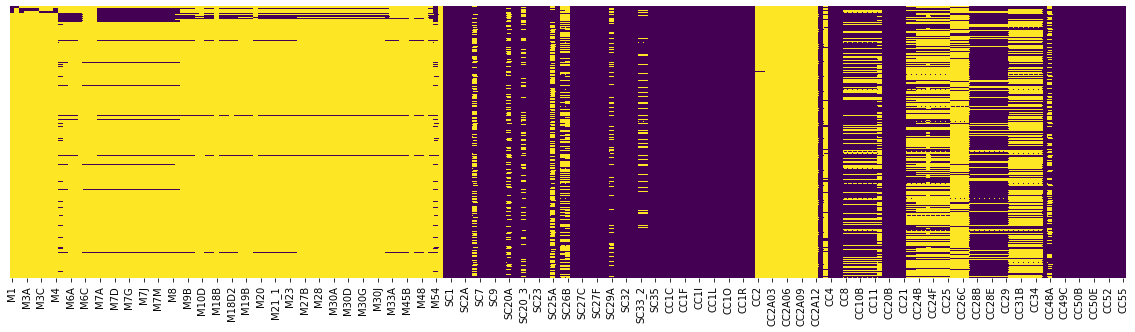

In [9]:
fig, ax = pyplot.subplots(figsize=(20,5))
sns.heatmap(dataset.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis',
           ax=ax)

Podemos observar que existem bastante valores nulos (representados em amarelo).

#### Verificando valores duplicados

In [10]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5032    False
5033    False
5034    False
5035    False
5036    False
Length: 5037, dtype: bool

A princípio não existem registros duplicados.

#### Visualizando atributo alvo

<AxesSubplot:xlabel='dsm_man'>

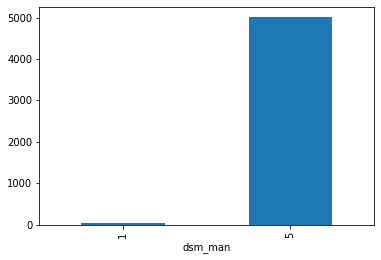

In [11]:
dataset.groupby('dsm_man').size().plot.bar()

Podemos notar que o dataset possui muitos exemplos da classe 1 (sim) e poucos exemplos da classe 2 (não), precisaremos utilizar técnicas de balanceamento ou enriquecimento de dados para tratar a situação.

In [12]:
dataset_mania_1 = dataset[dataset['dsm_man'] == 1]

<AxesSubplot:>

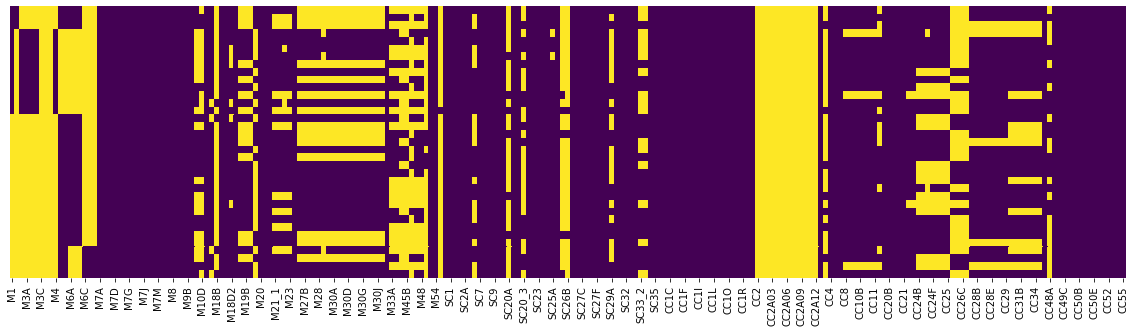

In [13]:
fig, ax = pyplot.subplots(figsize=(20,5))
sns.heatmap(dataset_mania_1.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis',
           ax=ax)

### Tratando valores nulos

#### Excluindo registros com mais 75% de valores nulos

In [14]:
dataset_t = dataset.copy()
dataset_t.drop([col for col, val in (dataset_t.isna().mean().round(4)*100).iteritems() if val > 75], axis=1, inplace=True)

<AxesSubplot:>

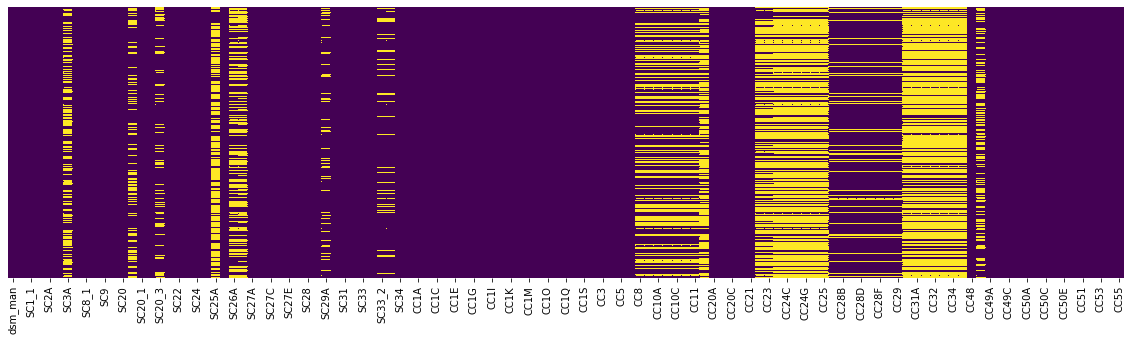

In [15]:
fig, ax = pyplot.subplots(figsize=(20,5))
sns.heatmap(dataset_t.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis',
           ax=ax)

Percebemos que todas as colunas de M foram retiradas, então talvez não seja a melhor abordagem a se fazer.

#### Tentando analisar individualmente (M, SC e CC)

In [16]:
dataset_M = dataset.copy()
dataset_SC = dataset.copy()
dataset_CC = dataset.copy()

for label, content in dataset_M.items():
    if label[0] != 'M' and label[0] != 'd':
        dataset_M.drop([label], axis=1, inplace=True)
for label, content in dataset_SC.items():
    if label[0] != 'S' and label[0] != 'd':
        dataset_SC.drop([label], axis=1, inplace=True)
for label, content in dataset_CC.items():
    if label[0] != 'C' and label[0] != 'd':
        dataset_CC.drop([label], axis=1, inplace=True)

#### Visualizando valores nulos em M

<AxesSubplot:>

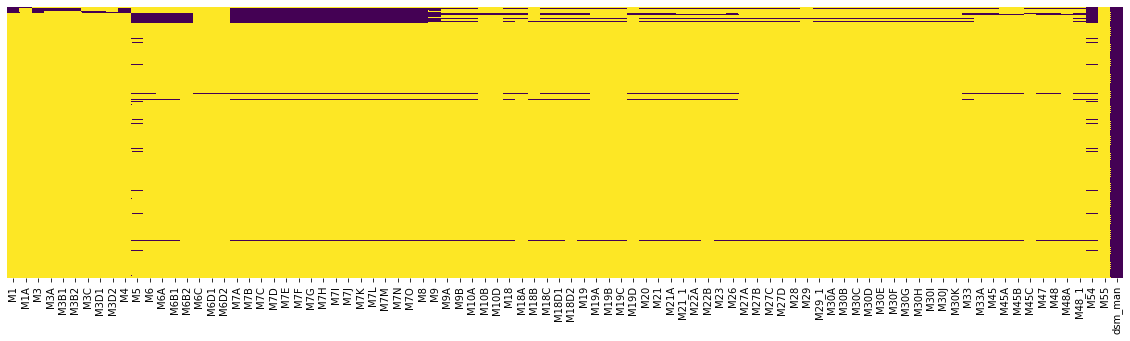

In [17]:
fig, ax = pyplot.subplots(figsize=(20,5))
sns.heatmap(dataset_M.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis',
           ax=ax)

#### Preenchendo valores nulos em M

Neste dataset, as perguntas feitas pelo entrevistador podem mudar conforme as respostas dos entrevistados. Este fato se dá pois, ao obter determinada informação, o entrevistador realiza o diagnostico do entrevistado e procura fazer perguntas mais específicas para ter a possibilidade de detectar, por exemplo, um transtorno comum.

Com base nessas informações, vamos atribuir o valor 0 nos registros que não possuem valores.

In [18]:
dataset_M = dataset_M.fillna(0)

#### Visualizando valores nulos em M

<AxesSubplot:>

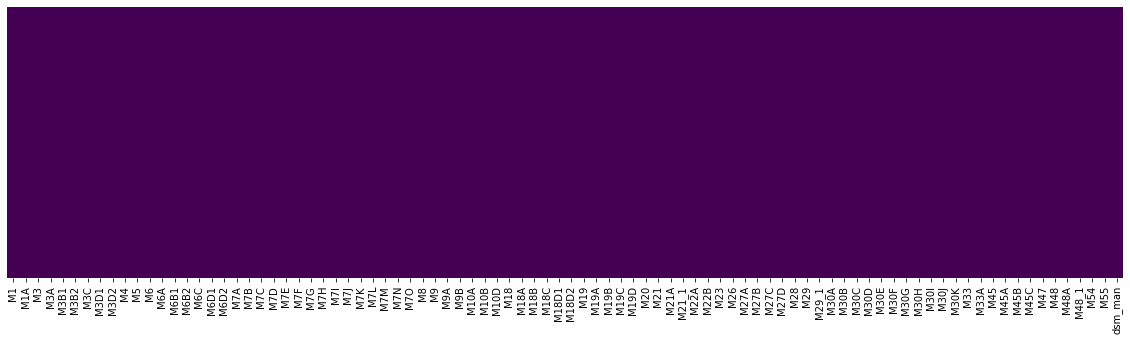

In [19]:
fig, ax = pyplot.subplots(figsize=(20,5))
sns.heatmap(dataset_M.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis',
           ax=ax)

#### Visualizando valores nulos em SC

<AxesSubplot:>

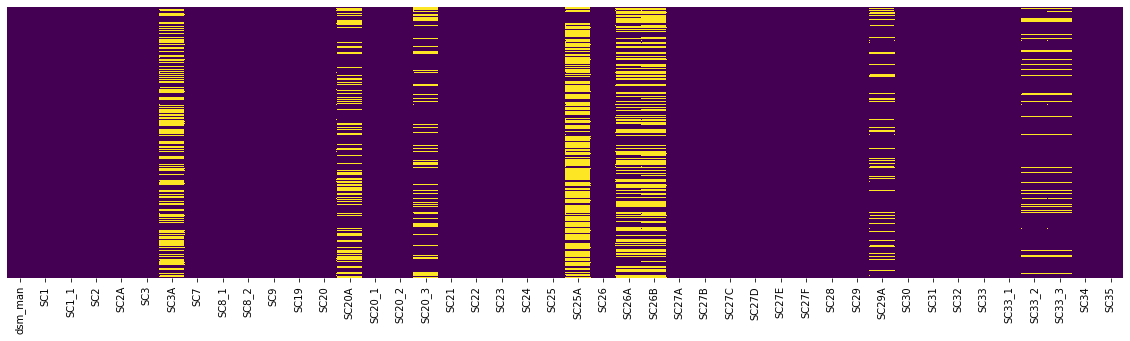

In [20]:
fig, ax = pyplot.subplots(figsize=(20,5))
sns.heatmap(dataset_SC.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis',
           ax=ax)

#### Excluindo colunas em SC com pelo menos 1 valor nulo

Como ainda não possuimos muitas informações sobre a importância desses registros, vamos excluir colunas que possuem pelo menos 1 valor nulo.

In [21]:
dataset_SC = dataset_SC.dropna(axis='columns')

#### Visualizando valores nulos em SC

<AxesSubplot:>

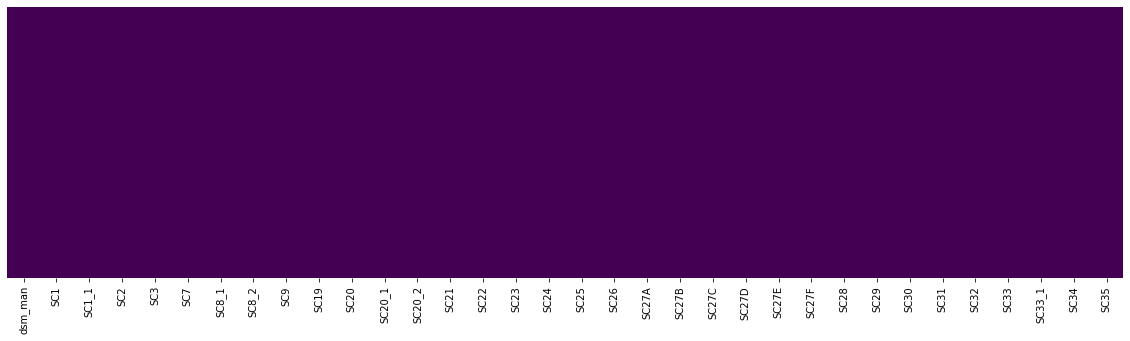

In [22]:
fig, ax = pyplot.subplots(figsize=(20,5))
sns.heatmap(dataset_SC.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis',
           ax=ax)

#### Visualizando valores nulos em CC

Assim como na análise anterior, como ainda não possuimos muitas informações sobre a importância desses registros, vamos excluir colunas que possuem pelo menos 1 valor nulo.

<AxesSubplot:>

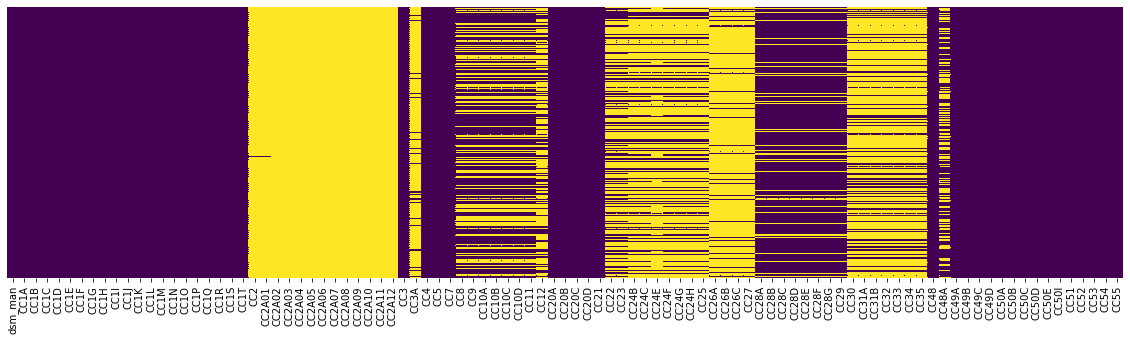

In [23]:
fig, ax = pyplot.subplots(figsize=(20,5))
sns.heatmap(dataset_CC.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis',
           ax=ax)

#### Excluindo colunas em CC com pelo menos 1 valor nulo

In [24]:
dataset_CC = dataset_CC.dropna(axis='columns')

#### Visualizando valores nulos em CC

<AxesSubplot:>

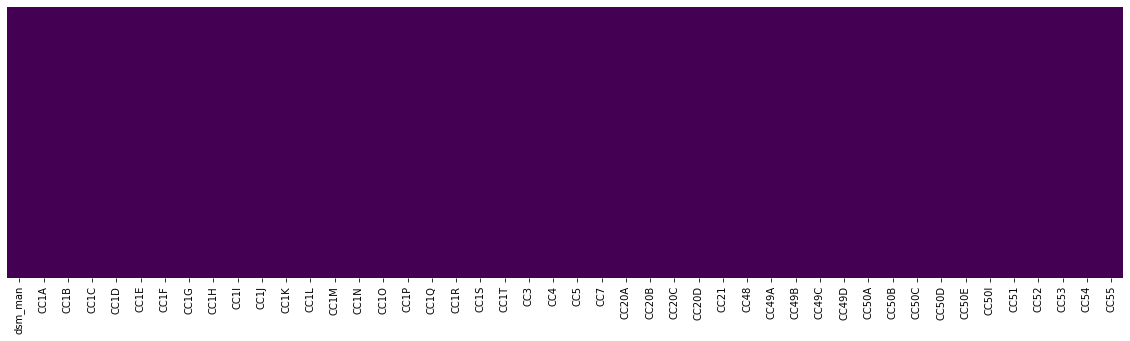

In [25]:
fig, ax = pyplot.subplots(figsize=(20,5))
sns.heatmap(dataset_CC.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis',
           ax=ax)

## 4. Análise Exploratória do Dataset

#### Análise em CC com Pandas Profile

In [26]:
profile = ProfileReport(dataset_CC, title='Pandas Profile Report')
profile.to_file("output_report_prom_profile.html")

Summarize dataset:   0%|          | 0/59 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### Análise em SC com Pandas Profile

In [28]:
profile = ProfileReport(dataset_SC, title='Pandas Profile Report')
profile.to_file("output_report_prom_profile.html")

Summarize dataset:   0%|          | 0/47 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### Análise em CC com Sweetviz

In [30]:
feature_config = sv.FeatureConfig(force_num=["dsm_man"])
my_report = sv.analyze(dataset_CC, target_feat="dsm_man", feat_cfg=feature_config)
my_report.show_html(filepath='Sweetviz_report_objective.html')

                                             |                                             | [  0%]   00:00 ->…

Report Sweetviz_report_objective.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Análise em SC com Sweetviz

In [31]:
feature_config = sv.FeatureConfig(force_num=["dsm_man"])
my_report = sv.analyze(dataset_SC, target_feat="dsm_man", feat_cfg=feature_config)
my_report.show_html(filepath='Sweetviz_report_objective.html')

                                             |                                             | [  0%]   00:00 ->…

Report Sweetviz_report_objective.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Análise em M com Sweetviz

In [32]:
feature_config = sv.FeatureConfig(force_num=["dsm_man"])
my_report = sv.analyze(dataset_M, target_feat="dsm_man", feat_cfg=feature_config)
my_report.show_html(filepath='Sweetviz_report_objective.html')

                                             |                                             | [  0%]   00:00 ->…

Report Sweetviz_report_objective.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Agrupando M, SC e CC após tratamento

In [33]:
dataset_CC.drop('dsm_man', axis=1, inplace=True)
dataset_SC.drop('dsm_man', axis=1, inplace=True)

In [34]:
dataset_M_SC_CC = pd.concat([dataset_SC, dataset_CC, dataset_M], axis=1)
dataset_M_SC_CC

,SC1,SC1_1,SC2,SC3,SC7,SC8_1,SC8_2,SC9,SC19,SC20,...,M45A,M45B,M45C,M47,M48,M48A,M48_1,M54,M55,dsm_man
0,56,2,14,4,3,4,4,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
1,51,2,24,1,3,4,2,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
2,38,2,4,5,2,5,4,5,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
3,43,1,5,1,2,5,4,1,1,1,...,42.0,2.0,0.0,5.0,5.0,0.0,0.0,1.0,0.0,1
4,45,1,9,1,3,2,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,40,2,3,1,2,3,2,2,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5033,24,1,16,5,1,1,1,2,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5034,57,2,1,5,2,3,2,2,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5035,19,1,30,5,2,3,3,1,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


#### Análise em do conjunto de dados M, SC e CC tratados e agrupados com Sweetviz

In [35]:
feature_config = sv.FeatureConfig(force_num=["dsm_man"])
my_report = sv.analyze(dataset_M_SC_CC, target_feat="dsm_man", feat_cfg=feature_config)
my_report.show_html(filepath='Sweetviz_report_objective.html')

                                             |                                             | [  0%]   00:00 ->…

Report Sweetviz_report_objective.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Considerações finais

Técnicas que podem ser aplicadas para tentar melhorar resultados:
- Balanceamento ou enriquecimento de dados do atributo alvo;
- Utilização de técnicas de seleção de caracteríticas para selecionar melhores atributos;
    - Nas análises com Sweetviz temos gráficos de correlações que podem ser usados;
- Analisar atritutos individualmente para reduzir dimensionalidade.

# Testando predição

In [82]:
dataset_M_SC_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Columns: 168 entries, SC1 to dsm_man
dtypes: float64(89), int64(79)
memory usage: 6.5 MB


In [83]:
array = dataset_M_SC_CC.values
X = array[:,0:167]
y = array[:,167]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions_train = model.predict(X_train)
predictions_validation = model.predict(X_validation)
print(sklearn.metrics.accuracy_score(Y_train, predictions_train))
print(sklearn.metrics.accuracy_score(Y_validation, predictions_validation))

0.9986761980407731
0.9904761904761905


c:\estudo\disciplinaslab\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
